# CAMPUS PLACEMENT PREDCTION  

# Import libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
df= pd.read_csv("C:/Users/HP/Desktop/PGDDS/final project/Placement_Data_Full_Class.csv")

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Observation:

We have

215 rows and
15 columns - 7 categorical features , 7 Numerical features ,1 - target

# About the Dataset
It has the following columns:

sl_no : Serial Number

gender : Gender- Male='M',Female='F'

ssc_p : Secondary Education percentage- 10th Grade

ssc_b : Board of Education- Central/ Others

hsc_p : Higher Secondary Education percentage- 12th Grade

hsc_b : Board of Education- Central/ Others

hsc_s : Specialization in Higher Secondary Education

degree_p : Degree Percentage

degree_t : Under Graduation(Degree type)- Field of degree education

workex : Work Experience

etest_p : Employability test percentage ( conducted by college)

specialisation : Post Graduation(MBA)- Specialization

mba_p : MBA percentage

status : Status of placement- Placed/Not placed

salary : Salary offered by corporate to candidates

In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
# Checking basic stats and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# MISSING VALUES


<Axes: >

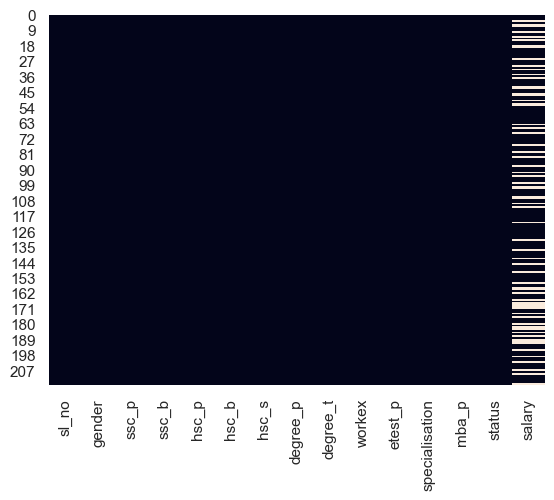

In [6]:
sns.heatmap(df.isnull(),cbar=False)


# We can see that there is only Salary column has Missing Values.
Do you wonder why?

Yes! The Salary has null values because the students who aren't placed will not have any Salary values.

We can replace the null values with 0.

In [7]:
#Replace NaN Values with Zeros using Pandas fillna() 
df['salary'] = df['salary'].fillna(0)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
df.drop(['sl_no'],axis=1) 
#Dropping sl_no as it is an insignificant feature

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
#getting the object columns
column=df.select_dtypes(include=['object'])
for col in column:
    display(df[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

# OBSERVATION:
Looks like except for hsc_s and degree_t with 3 classes, all other have 2 classes each and also we can see that this data is slightly imbalanced as we have 148 placed students and 67 not placed students.

# 1. Exploratory Data Visualization

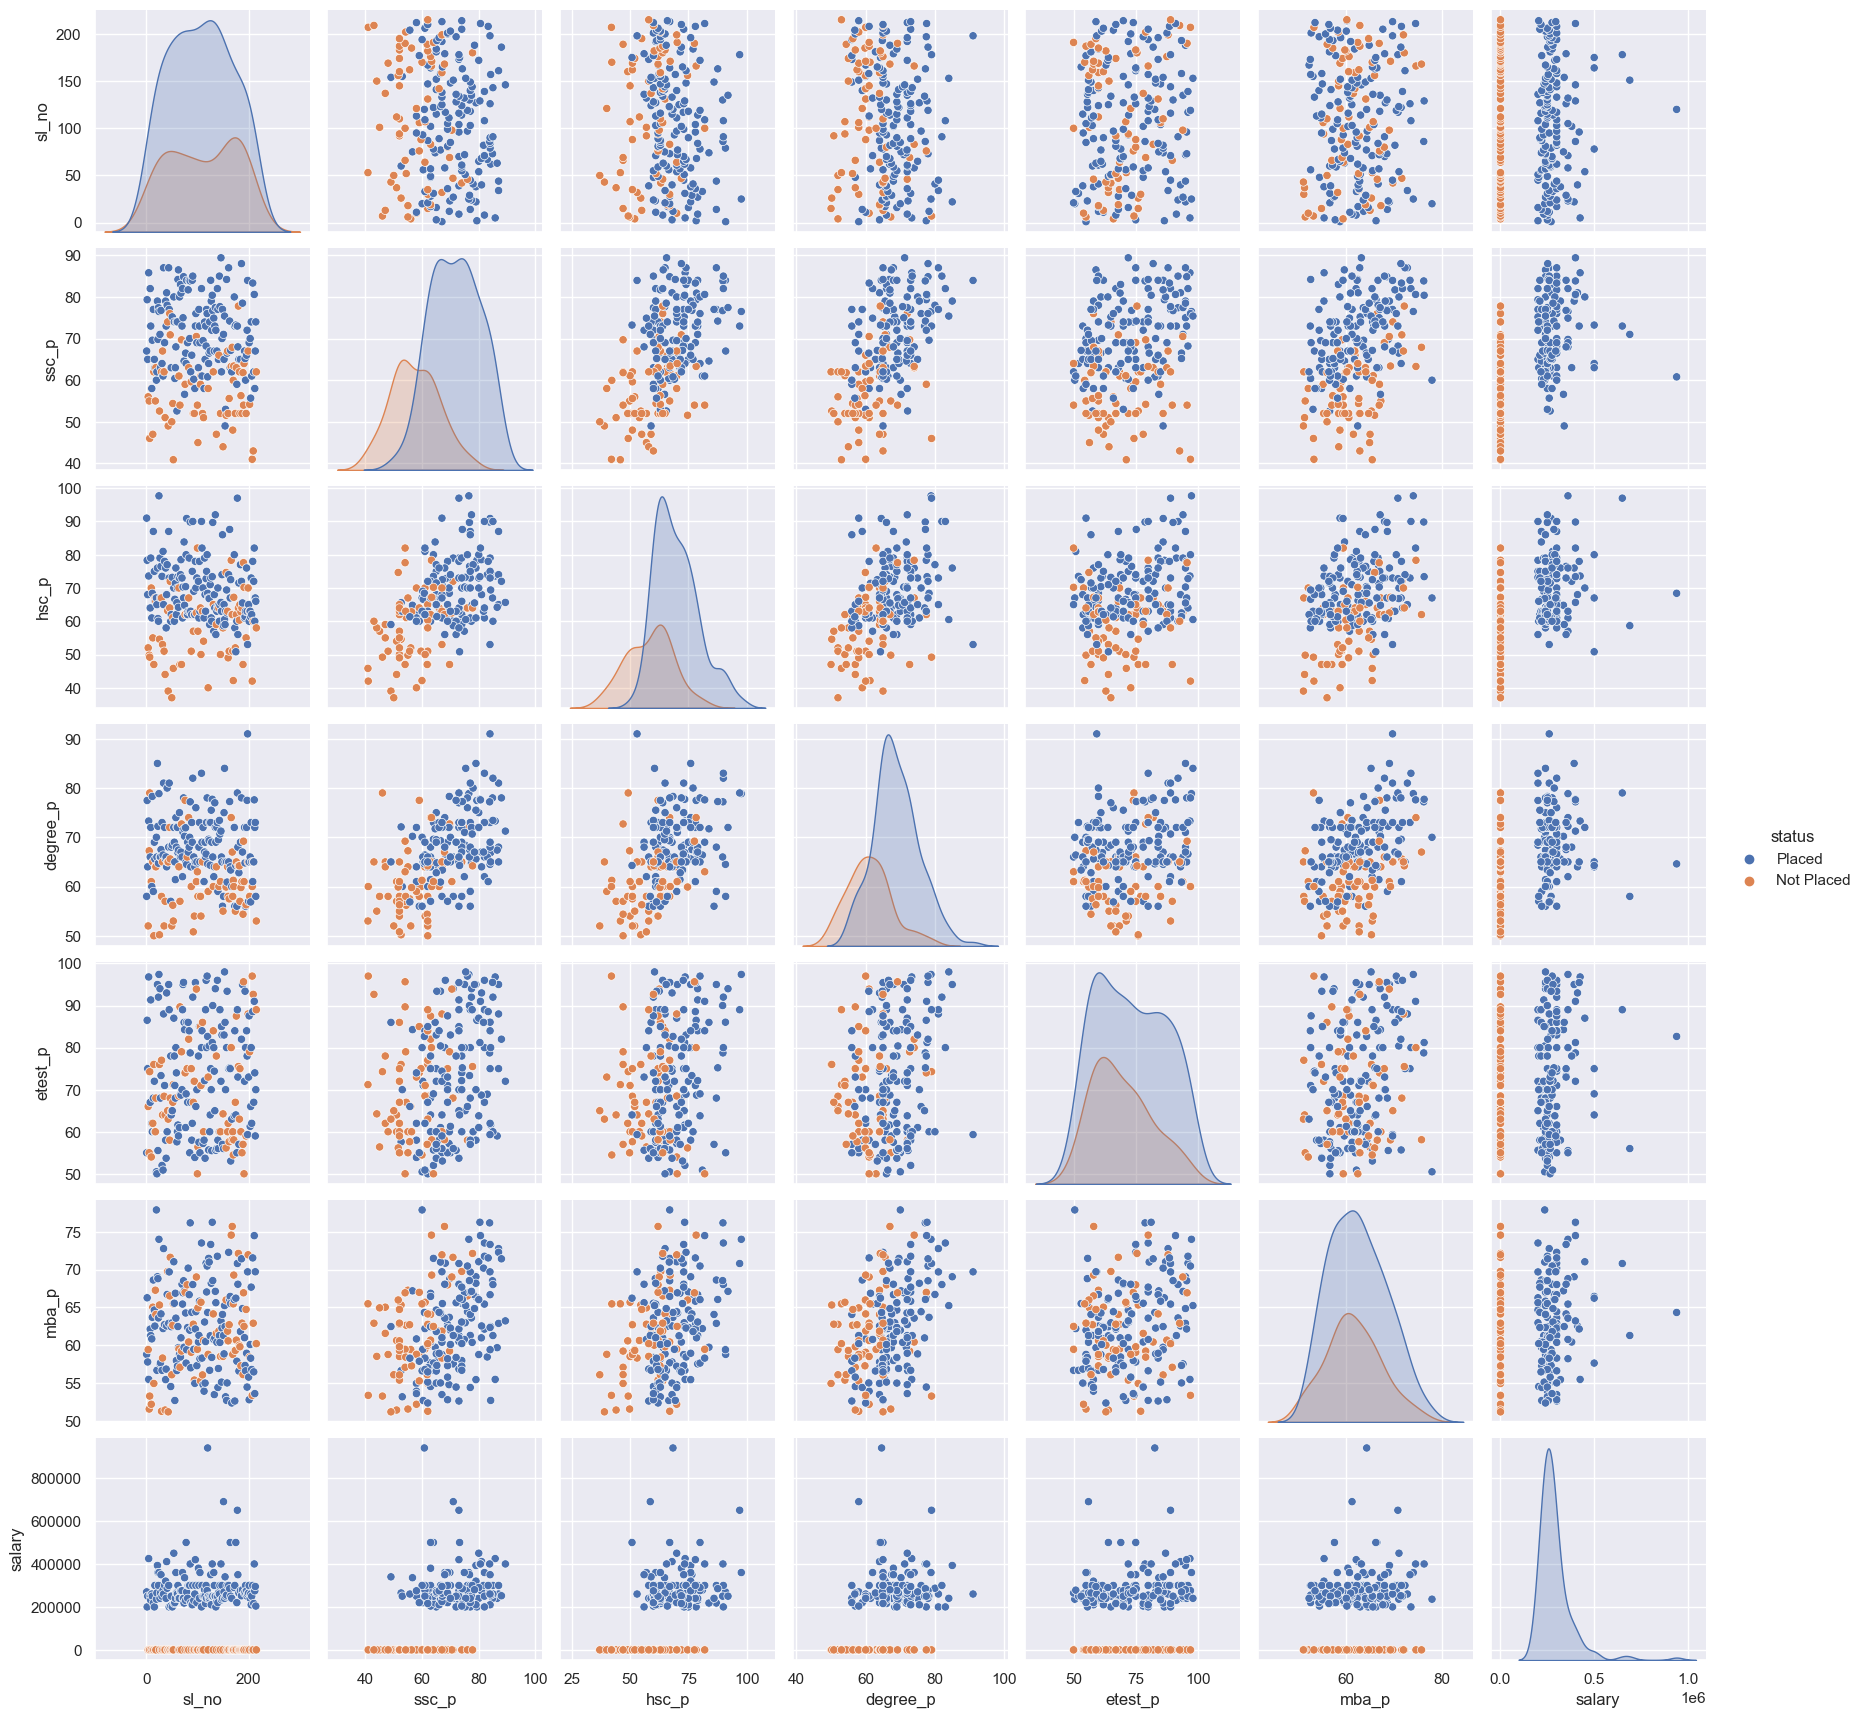

In [11]:
sns.pairplot(data=df,kind='scatter',hue='status')

Correlation between Salary, Employability Test %, Secondary Education % and Higher Secondary Education %

From the above pair plot we can conclude that those students who consistently score lower percentages in their different examinations are not placed. It is strongly evident in the SSC, HSC and Degree percentage but in Etest and Mba there is not good evidence to support the claim

# Feature : Gender 


# does gender affect placement ?

In [12]:
df.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

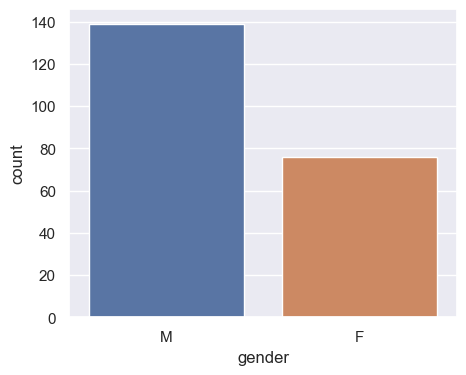

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x ='gender', data = df)
plt.show()

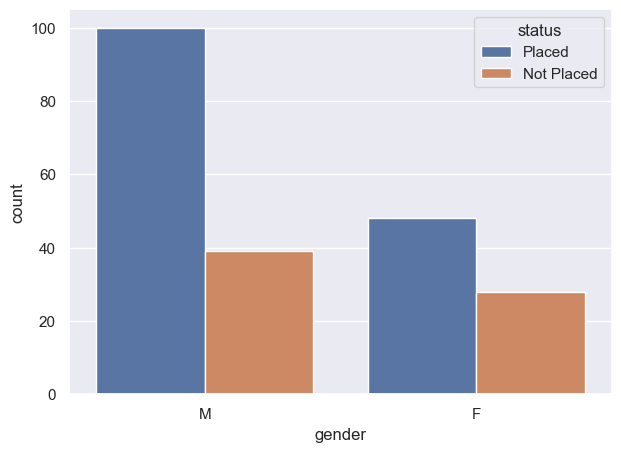

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x ='gender', hue ='status',data=df)
plt.show()

<Axes: xlabel='salary', ylabel='gender'>

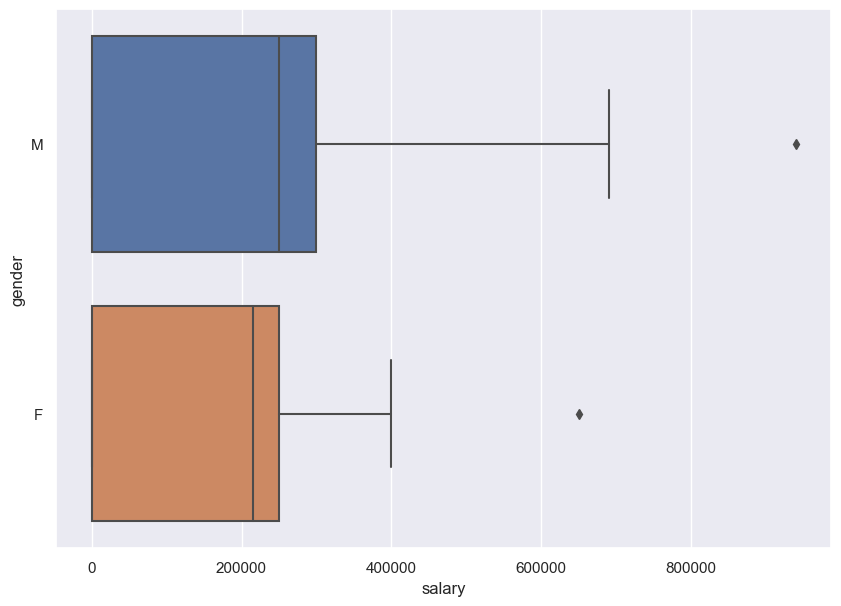

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(y='gender',x='salary',data=df)


# OBSERVATIONS:
We have samples of 139 Male studets and 76 Female students.
The number of male students are almost double as compared to female.

30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.

Male students are offered slightly greater salary than female on an average.

# Feature : ssc_b,ssc_p,hsc_b,hsc_p,statu
### Does the board of education affect placements?

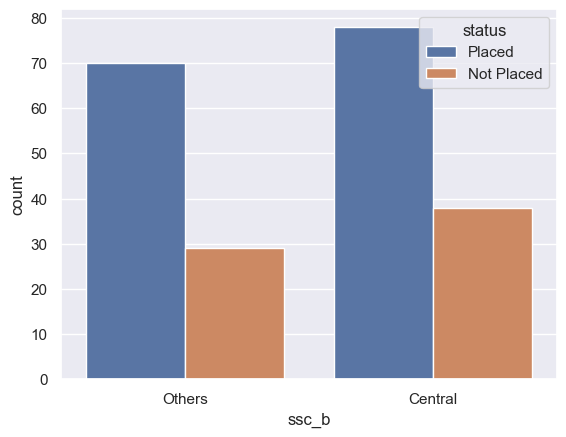

In [16]:
sns.countplot(x='ssc_b',hue='status',data=df)
plt.show()

<Axes: ylabel='ssc_p'>

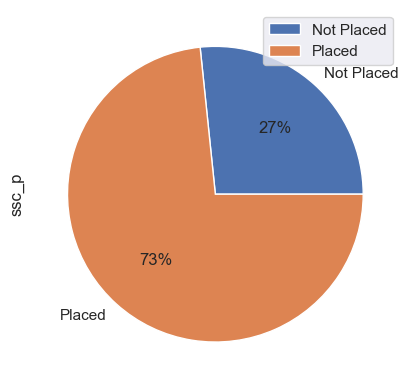

In [17]:
df.groupby(['status']).sum().plot(kind='pie', y='ssc_p',autopct='%1.0f%%')

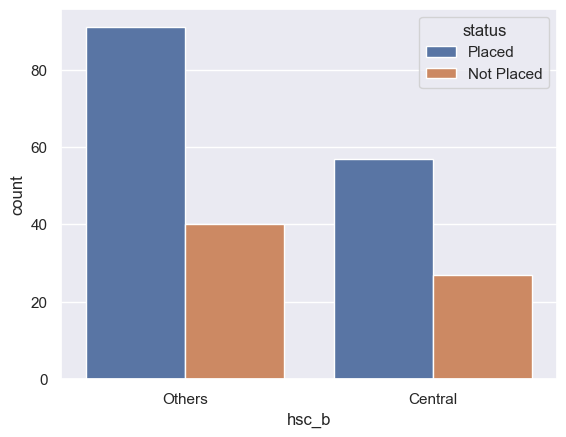

In [18]:
sns.countplot(x='hsc_b',hue='status',data=df)
plt.show()

<Axes: ylabel='hsc_p'>

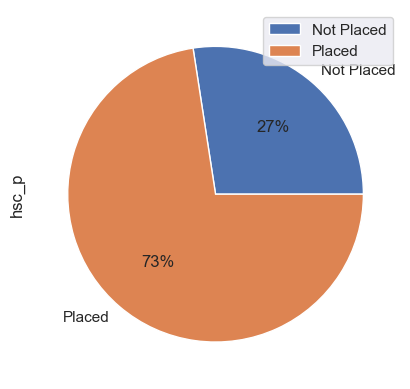

In [19]:
df.groupby(['status']).sum().plot(kind='pie', y='hsc_p',autopct='%1.0f%%')

# Observetion:
There is count of central board students is very high as compared to all other boards in ssc_b but its reverse in hsc_b.

Look like not much difference between in the fraction of placed candidates in respective boards.

Board doesn't matter in placements

# Feature : degree_t,specialisation
### Which degree and MBA specialization has the highest Salary?

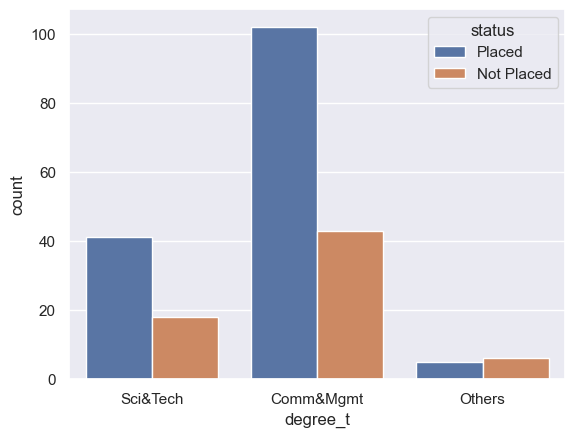

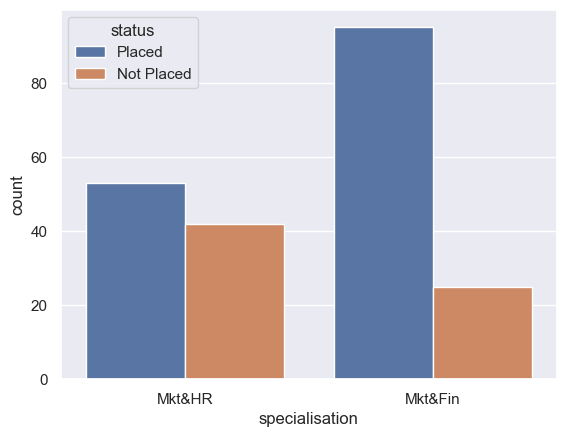

In [20]:
sns.countplot(x='degree_t',hue='status',data=df)
plt.show()

sns.countplot(x='specialisation',hue='status',data=df)
plt.show()

Text(0.5, 1.0, 'MBA ')

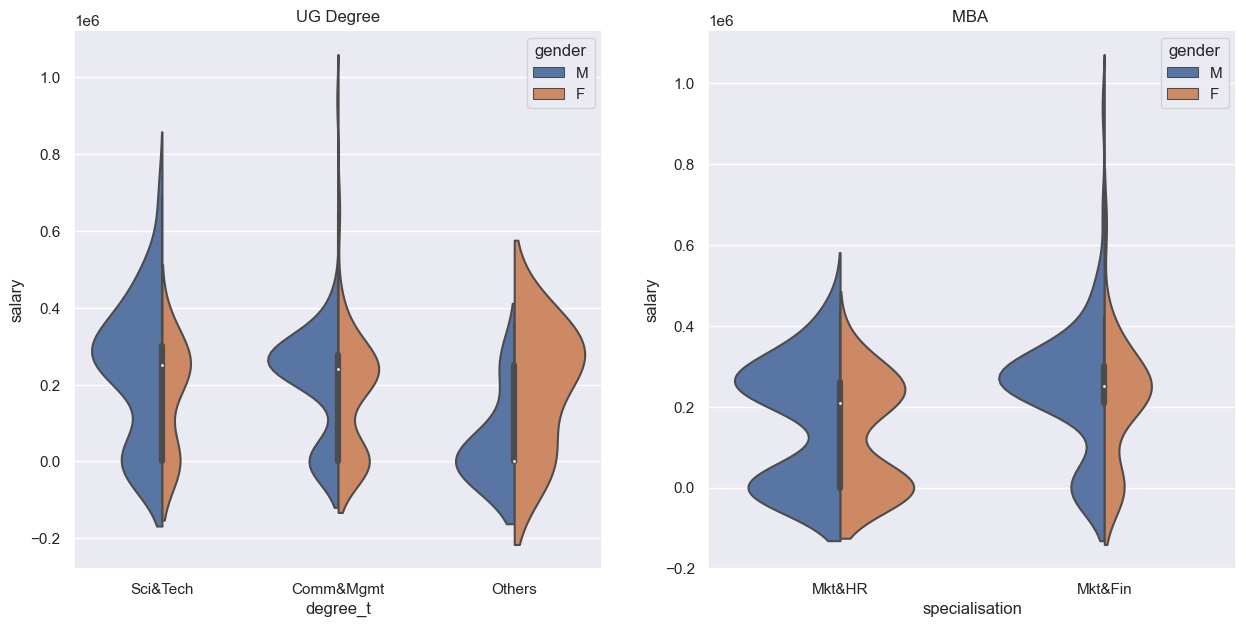

In [21]:
plt.figure(figsize = (15,7))
ax=plt.subplot(121)
sns.violinplot(x='degree_t',y='salary',hue='gender',data=df,split=True,scale="count")
ax.set_title('UG Degree')

ax=plt.subplot(122)
sns.violinplot(x='specialisation',y='salary',hue='gender',data=df,split=True,scale="count")
ax.set_title('MBA ')

# Observation :
Looks like Commerce and Science degree students are preffered by companies which is obvious. Students who opted for Others have very low placement chance.

Specialisation is a clear indicator in placements. Compared to Mkt&Fin, Mkt&HR students have low placements. This might be because there is low requirements for HR in a company.

More Highly Paid Jobs for Mkt&Fin students.

Commerce&Mgmt students occasionally get dream placements with high salary.

# Feature : ssc_p,hsc_p,degree_p,mba_p
### Does your academic score influence your chance of placement?

Text(0.5, 1.0, 'MBA percentage')

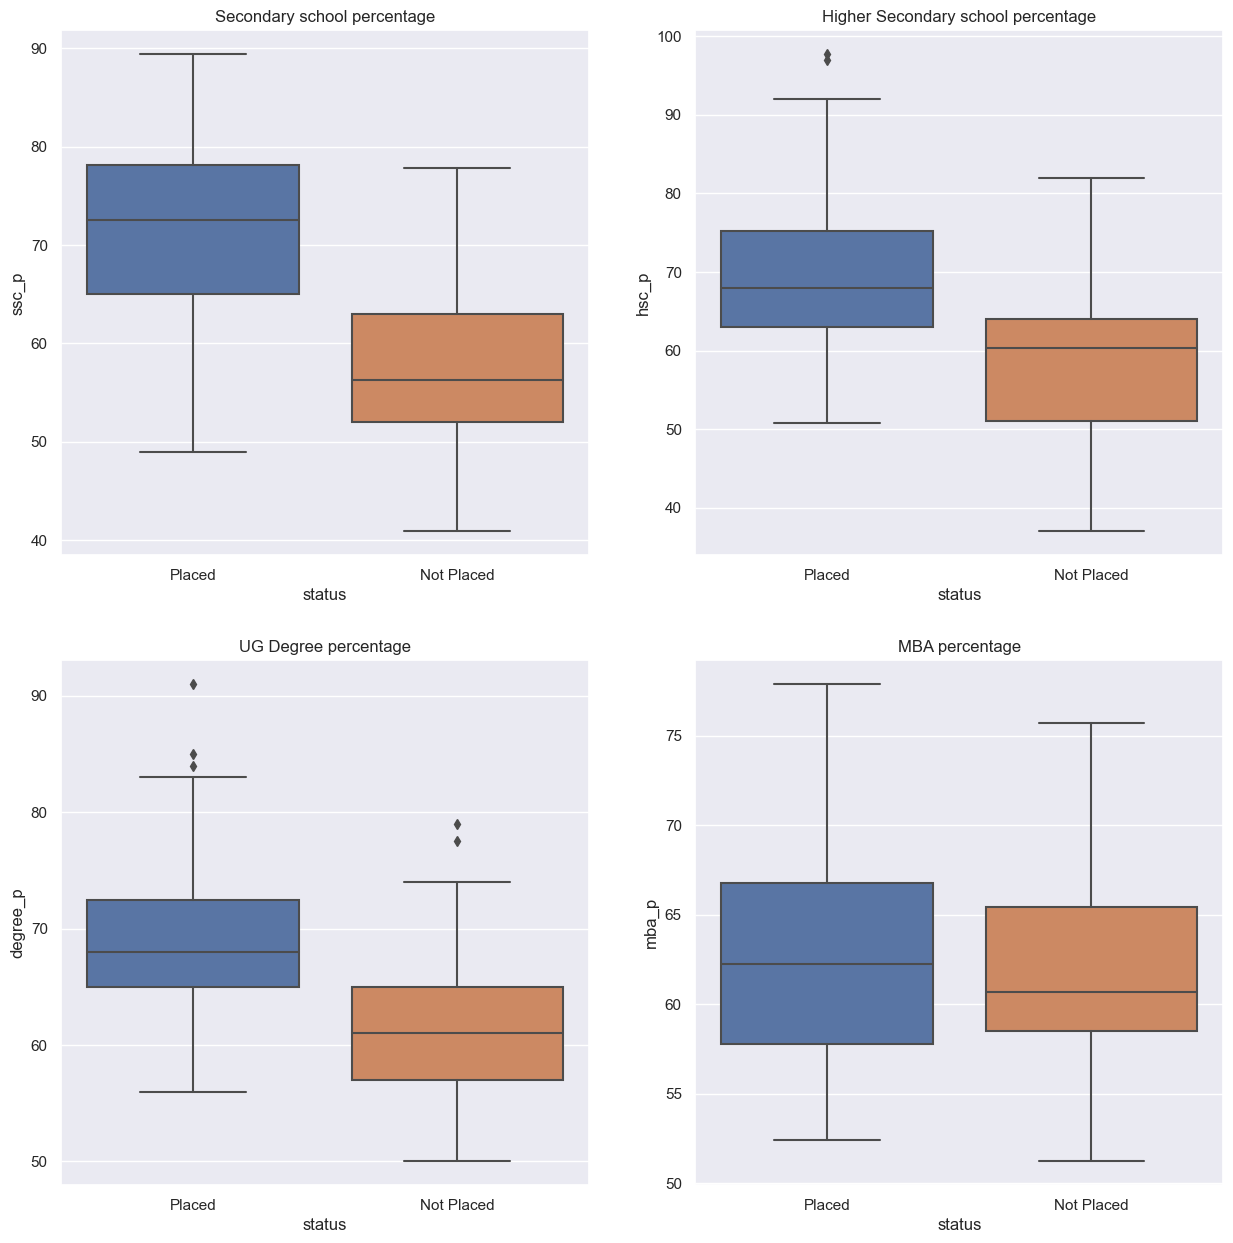

In [22]:
plt.figure(figsize = (15, 15))

ax=plt.subplot(221)
sns.boxplot(x='status',y='ssc_p',data=df)
ax.set_title('Secondary school percentage')

ax=plt.subplot(222)
sns.boxplot(x='status',y='hsc_p',data=df)
ax.set_title('Higher Secondary school percentage')

ax=plt.subplot(223)
sns.boxplot(x='status',y='degree_p',data=df)
ax.set_title('UG Degree percentage')

ax=plt.subplot(224)
sns.boxplot(x='status',y='mba_p',data=df)
ax.set_title('MBA percentage')

# OBSERVATION :
Most of the candidates educational performances are between 60-80%
We can see that getting good percentages in MBA does not guarantee placement of the candidate.
Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand. So as per the plot,percentage do not influence the placement status
#### These percentages don't have any influence over their salary.

# Feature:workerx

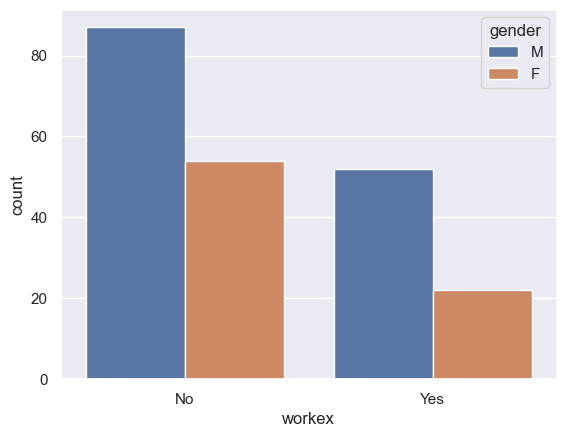

In [23]:
sns.countplot(x='workex',hue='gender',data=df)
plt.show()

# Feature :Salary

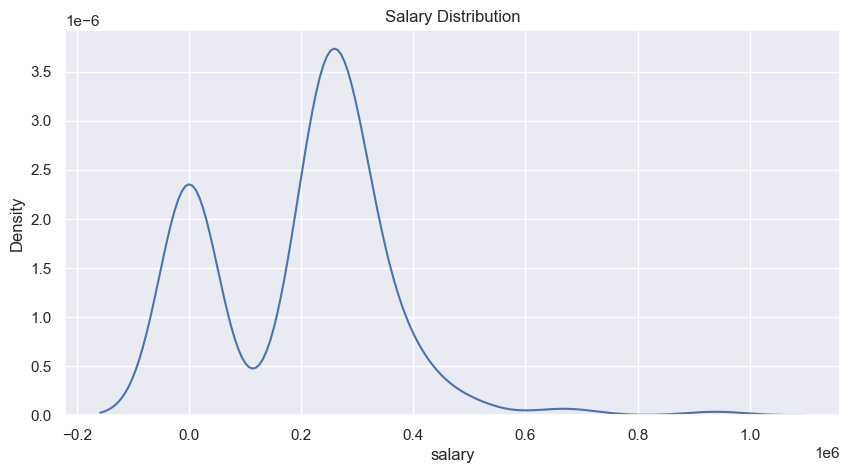

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

# Work Experience v/s Salary

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

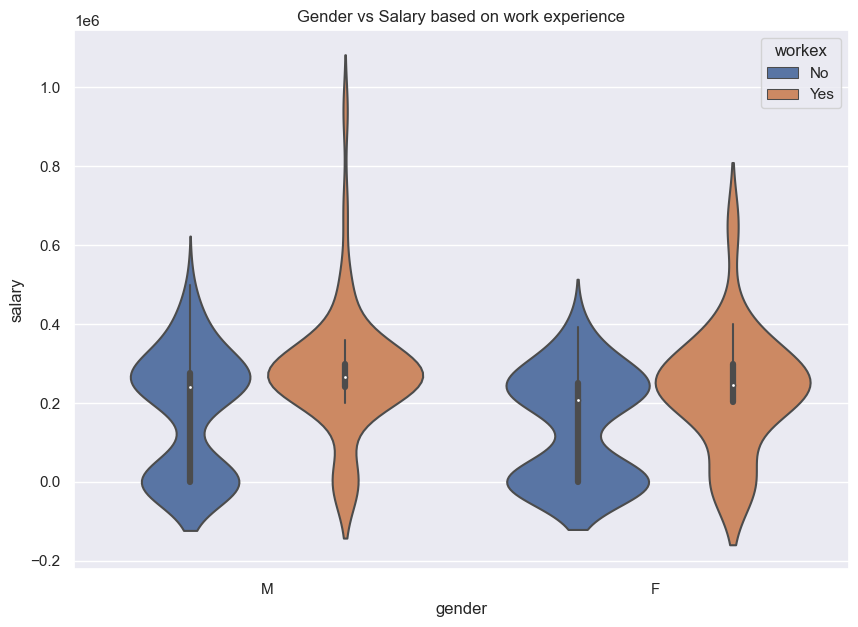

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["workex"])
plt.title("Gender vs Salary based on work experience")

# OBSERVATION :
Work Experience is a clear indicator as more work experience results in higher CTC jobs.

Male candidates are making more money as compared to female candidates.

# 2. Feature Engineering


# Creating Dummies Variables

Dummy variable is a categorical variable that has been transformed into numeric. 

For example the column Gender, we have "male" and "female" we will transform these variables into numeric. 

Creating a new column just for Men. and Women, where 1 will be set to positive and 0 to negative

In [26]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["ssc_b"] = df.ssc_b.map({"Others":0,"Central":1})
df["hsc_b"] = df.hsc_b.map({"Others":0,"Central":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [27]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,0,91.00,0,0,58.00,1,0,55.0,0,58.80,1,270000.0
1,2,0,79.33,1,78.33,0,1,77.48,1,1,86.5,1,66.28,1,200000.0
2,3,0,65.00,1,68.00,1,2,64.00,0,0,75.0,1,57.80,1,250000.0
3,4,0,56.00,1,52.00,1,1,52.00,1,0,66.0,0,59.43,0,0.0
4,5,0,85.80,1,73.60,1,0,73.30,0,0,96.8,1,55.50,1,425000.0


In [28]:
df.drop(['sl_no','salary'],axis=1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,0,58.00,1,0,55.0,0,58.80,1
1,0,79.33,1,78.33,0,1,77.48,1,1,86.5,1,66.28,1
2,0,65.00,1,68.00,1,2,64.00,0,0,75.0,1,57.80,1
3,0,56.00,1,52.00,1,1,52.00,1,0,66.0,0,59.43,0
4,0,85.80,1,73.60,1,0,73.30,0,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,0,77.60,0,0,91.0,1,74.49,1
211,0,58.00,0,60.00,0,1,72.00,1,0,74.0,1,53.62,1
212,0,67.00,0,67.00,0,0,73.00,0,1,59.0,1,69.72,1
213,1,74.00,0,66.00,0,0,58.00,0,0,70.0,0,60.23,1


# Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

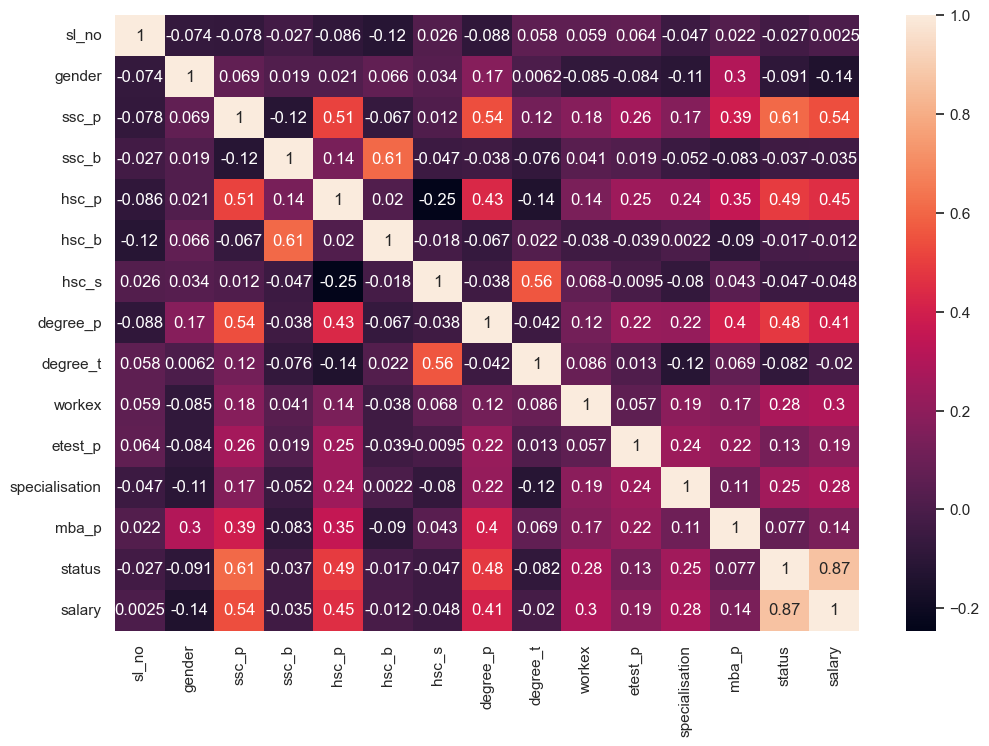

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#  Feature selection
We will now select the features (X) for our model. 
These features will help our model identify patterns. The features will be columns.

"When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential."

In [30]:
# Seperating Features and Target
X = df[[ 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p',  'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

# Building Machine Learning Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (172, 8)
X-Test: (43, 8)
Y-Train: (172,)
Y-Test: (43,)


Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

# Logistic Regression:


In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train)*100,2)

# Random Forest:

In [34]:
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

ran_pred = ranforest.predict(X_test)

ranforest.score(X_train, y_train)

acc_ranforest = round(ranforest.score(X_train, y_train)*100,2)

# K Nearest Neighbor :

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train)*100,2)

# Gaussian Naive Bayes:

In [36]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gau_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)

# Linear Support Vector Machine:

In [37]:
svm = svm.SVC()
svm.fit(X_train, y_train)

svm_pred =svm.predict(X_test)

acc_svm= round(svm.score(X_train, y_train)*100,2 )

# Which is the best Model ?

In [38]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              ' Support Vector Machine'
            ],
    'Train Score': [ acc_knn, acc_log, 
              acc_ranforest, acc_gaussian,  
              acc_svm],
    'Accuracy_score':[round(accuracy_score(y_test,knn_pred) * 100),
                round(accuracy_score(y_test,log_pred) * 100),
                round(accuracy_score(y_test,ran_pred) * 100),
                round(accuracy_score(y_test,gau_pred)* 100),
                round(accuracy_score(y_test,svm_pred)* 100)            
        
    ]

})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.set_index('Accuracy_score')
result_df

,Model,Train Score
Accuracy_score,,
86,Logistic Regression,88.37
81,Random Forest,100.00
79,KNN,90.12
79,Naive Bayes,84.30
77,Support Vector Machine,86.05


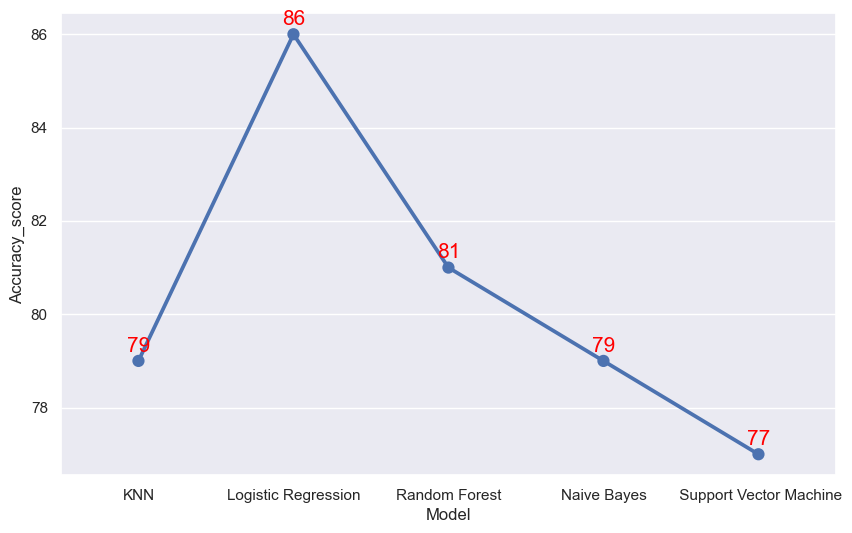

In [39]:
plt.subplots(figsize=(10,6))
ax=sns.pointplot(x='Model',y="Accuracy_score",data=results)
labels = (results["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+0.2, str(v), horizontalalignment = 'center', size = 15, color = 'red')

As we can see, the logistic Regression classifier is the best model for this data set.

# logistic Regression Model


In [40]:

cm_lr = confusion_matrix(y_test, log_pred)
print('Confusion matrix for logistic Regression\n',cm_lr)

accuracy_lr = accuracy_score(y_test,log_pred)
print('accuracy_logistic_Regression : %.3f' %accuracy_lr)

precision_lr =precision_score(y_test, log_pred)
print('precision_logistic_Regressiont : %.3f' %precision_lr)

recall_lr =  recall_score(y_test, log_pred)
print('recall_logistic_Regression : %.3f' %recall_lr)

f1_lr = f1_score(y_test,log_pred)
print('f1-score_logistic_Regression : %.3f' %f1_lr)



Confusion matrix for logistic Regression
 [[ 9  3]
 [ 3 28]]
accuracy_logistic_Regression : 0.860
precision_logistic_Regressiont : 0.903
recall_logistic_Regression : 0.903
f1-score_logistic_Regression : 0.903


# Thank You